In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math

dataset = np.load('kmeans_data.npy')
print(len(dataset))

3000


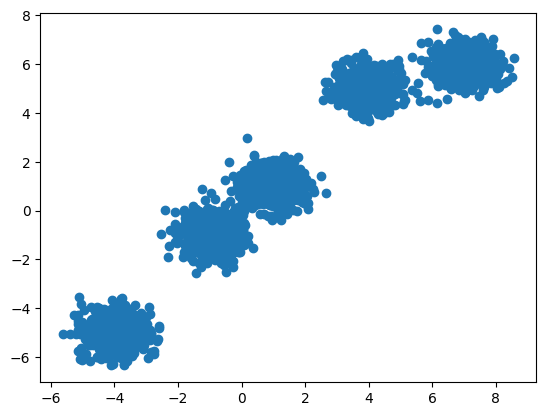

In [84]:
plt.scatter(dataset.T[0], dataset.T[1])
plt.show()

In [207]:
def get_manhatten_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def calculate_silhoutte_score(dataset, cluster_label, cluster_number):
    number_of_datapoints = len(dataset)
    s = np.zeros(number_of_datapoints)
    for i in range(number_of_datapoints):
        a_i = np.mean([get_manhatten_distance(dataset[i], dataset[j]) for j in range(number_of_datapoints) if cluster_label[j] == cluster_label[i]])
        b_i = np.min([np.mean([get_manhatten_distance(dataset[i], dataset[j]) for j in range(number_of_datapoints)
        if cluster_label[j] == k]) for k in range(cluster_number) if k!= cluster_label[i]])
        s_i = (b_i - a_i) / max(a_i, b_i)
        s[i] = s_i
    avg_s = np.sum(s) / len(s)
    return avg_s

In [208]:
def doKMeans(dataset, k):
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]
    while True:
        clusters = [[] for _ in range(k)]
        for point in dataset:
            distance_matrix = [np.linalg.norm(point-centroid) for centroid in centroids]
            cluster_index = np.argmin(distance_matrix)
            clusters[cluster_index].append(point)
        new_centroids = np.zeros((k,2))
        for j, cluster in enumerate(clusters):
            new_centroids[j] = np.mean(cluster, axis=0)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    distances = np.zeros((dataset.shape[0], k))
    for i, centroid in enumerate(centroids):
        distances[:,i] = np.linalg.norm(dataset-centroid, axis=1)

    clusters = np.argmin(distances, axis=1)
    return clusters

In [209]:
s_score = []
for number_of_clusters in range(2, 11):
  clusters = doKMeans(dataset, number_of_clusters)
  s_score.append(calculate_silhoutte_score(dataset, clusters, number_of_clusters))

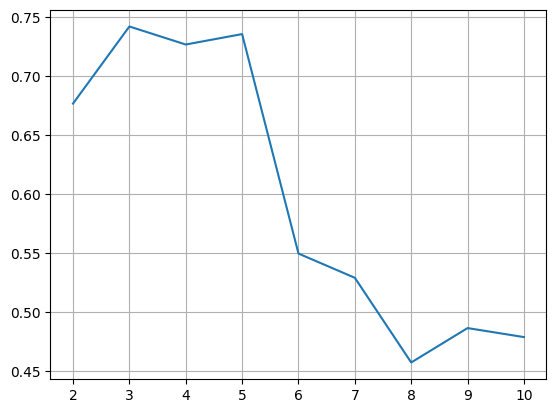

In [210]:
plt.plot([2,3,4,5,6,7,8,9,10], s_score)
plt.grid()
plt.show()

FROM THE GRAPH IT CAN BE CLEARLY SEEN FROM THE GRAPH THAT THE OPTIMAL VALUE OF SHOULD BE 3

In [211]:
  print(s_score)

[0.6765915816533004, 0.7419627615731385, 0.7266726633701648, 0.735509502827275, 0.5494267417365266, 0.5288815995666, 0.45708094666782323, 0.4862488052870281, 0.4786072862247144]


From silhoutte analysis we can conclude that optimal value of K should be 3

So for fuzzy c means:
c = 3
m = 2
beta = 0.3

In [212]:
# Fuzzy C Means
def fuzzy_c_means(X, c, m, beta):
    no_of_datapoints = len(dataset)
    U = np.random.rand(no_of_datapoints, c)
    U = U / np.sum(U, axis=1)[:, None]
    centroids = np.zeros((c,len(X[0])))
    while True:
        for j in range(c):
            num = np.sum([(U[i,j]**m)*X[i] for i in range(no_of_datapoints)], axis=0)
            den = np.sum([U[i,j]**m for i in range(no_of_datapoints)])
            centroids[j] = num/den
        distances = np.sqrt(np.sum((X[:, None] - centroids) ** 2, axis=2))

        U_new = 1 / (distances ** (2 / (m - 1)))
        U_new = U_new / np.sum(U_new, axis=1)[:, None]

        if np.max(np.abs(U_new - U)) < beta:
            break
        U = U_new

    return centroids, U

In [213]:
def calculate_J(X, U, V, m):
    distances = np.sqrt(np.sum((X[:, None] - V) ** 2, axis=2))
    J = np.sum(U**m * distances**2)
    return J

In [228]:
J = np.inf
U = []
V = []
for i in range(100000):
    a, b = fuzzy_c_means(dataset, 3, 2, 0.3)
    j = calculate_J(dataset, b, a, 2)
    if j < J:
        J = j
        V = a
        U = b
    break

In [229]:
J

6810.490406920602

In [220]:
V

array([[ 0.62703301,  0.62395142],
       [ 5.57258801,  5.49418166],
       [-3.09086593, -3.78132006]])

In [221]:
U

array([[0.08310104, 0.89023461, 0.02666435],
       [0.93227311, 0.02778539, 0.03994149],
       [0.13837992, 0.03996836, 0.82165171],
       ...,
       [0.06520918, 0.90709236, 0.02769846],
       [0.55292211, 0.03283485, 0.41424303],
       [0.94241874, 0.0281467 , 0.02943456]])